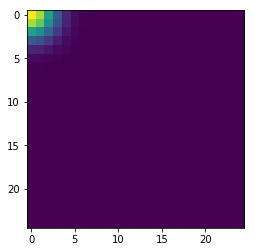

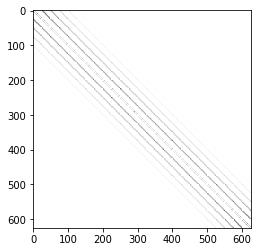

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit as sigmoid
%matplotlib inline


n_ = 25
n = n_**2
T = np.zeros((n,n))

r = 10.0

x = np.linspace(-r,r,n_)
y = np.linspace(-r,r,n_)
xx_, yy_ = np.meshgrid(x, y)
xx_ = xx_.reshape(-1)
yy_ =  yy_.reshape(-1)
# z = np.sqrt(xx**2 + yy**2)
# pr = np.exp(-(z)**2/20.1)*sigmoid(0.*(z))
# print z.shape

# print xx_.shape
# print yy_.shape
# print (xx_*yy_).shape
# print (xx_*yy_)[1,1]

# print pr.shape

# pr /= np.sum(pr)


for i in range(n):
    r = 10.0
    mu = (xx_[i],yy_[i])

    x = np.linspace(mu[0]-r,mu[0]+r,n_)
    y = np.linspace(mu[1]-r,mu[1]+r,n_)
    xx, yy = np.meshgrid(x, y, sparse=True)
    z = np.sqrt(xx**2 + yy**2)
    pr = np.exp(-z**2/5.)
    pr /= np.sum(pr)
    T[n - i -1,:] = pr.reshape(-1)

T = (T+T.T)/2

np.fill_diagonal(T, 0.0)

for i in range(n):
    T[i] /= np.sum(T[i])

plt.imshow(pr)
plt.show()
    
# for i in range(n):
# #     T[i] = np.roll(pr, i)
#     pr = np.zeros(n)
#     x_ = np.linspace(-10.,10.,100) - x[i]
#     pr = np.exp(-x_**2/10.1)*sigmoid(0.*x_)
#     pr /= np.sum(pr)
#     T[i] = pr.copy()

plt.imshow(T, cmap="binary", interpolation="none")
plt.show()


# lam, v = np.linalg.eig(T)
# v = v.T


(625, 625)


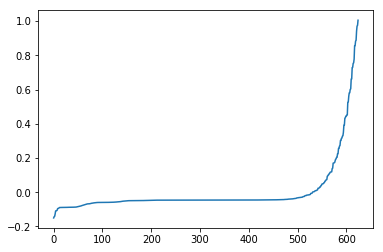

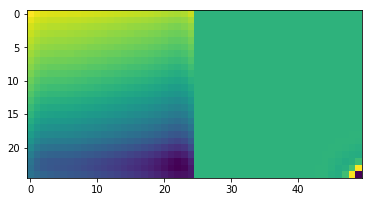

In [84]:
# assert np.all(T==T.T)

lam, vec = np.linalg.eigh(T )
sorted_indices = np.argsort(lam)
vec = vec[:, sorted_indices].T
print vec.shape
plt.plot(lam)
plt.show()

v1 = np.real(vec[-1].reshape((n_,n_)))
v1 -= np.amin(v1)
v1 /= np.amax(v1)
v2 = np.real(vec[0].reshape((n_,n_)))
v2 -= np.amin(v2)
v2 /= np.amax(v2)
plt.imshow(np.concatenate([v1,v2], axis=1 ))



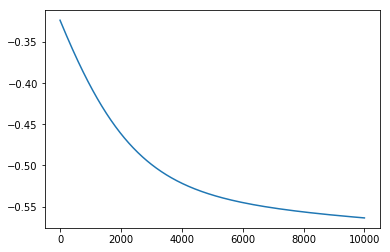

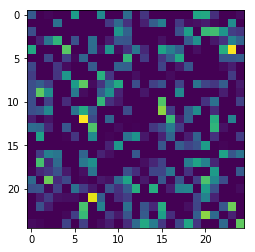

In [123]:
import tensorflow as tf

v_init = np.random.randn(n,1)
# v_init /= np.sum(v_init)
v  = tf.Variable(v_init,dtype=tf.float32)
v_  = tf.Variable(v_init,dtype=tf.float32)
v_ = tf.nn.softplus(v_)
# v_ = tf.nn.softplus(v)
# v_ = tf.nn.sigmoid(v)
# v_ = tf.exp(v)
# v_ = v
norm_squared = tf.reduce_sum(v_*v_)
G = tf.placeholder(dtype=tf.float32,shape=[n,n])

J = - tf.reduce_sum(v_*tf.matmul(G,v_))/norm_squared
learning_rate = 0.1

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train_step = optimizer.minimize(J)
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)


feed_dict = {
    G: T
}

d = 10000
ws = np.zeros((d,n))
losses = []
for i in range(10000):
    _, loss, w = sess.run([train_step, J, v_], feed_dict = feed_dict)
    ws[i] = w.reshape(-1)
    losses.append(loss)
    
plt.plot(losses)
plt.show()
t = 100
# w_ = np.dot(T, ws[t])
# plt.imshow(w_.reshape((n_,n_)))
# plt.show()
plt.imshow(ws[t].reshape((n_,n_)))




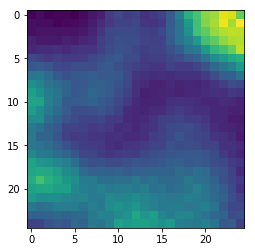

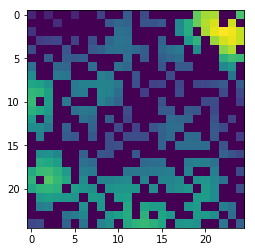

In [124]:
t = -1
w_ = np.dot(T, ws[t])
plt.imshow(w_.reshape((n_,n_)))
plt.show()
plt.imshow(ws[t].reshape((n_,n_)))


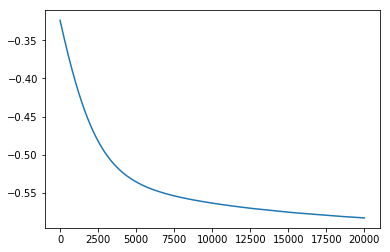

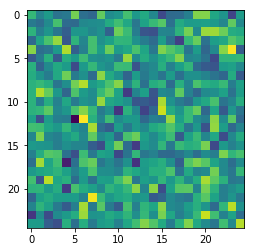

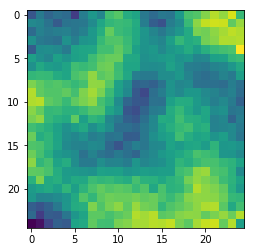

In [125]:
for i in range(10000):
    _, loss, w = sess.run([train_step, J, v], feed_dict = feed_dict)
    ws[i] = w.reshape(-1)
    losses.append(loss)
    
plt.plot(losses)
plt.show()
t = -1
w_ = np.dot(T, ws[t])
plt.imshow(ws[t].reshape((n_,n_)))
plt.show()
plt.imshow(w_.reshape((n_,n_)))
plt.show()

